<a href="https://colab.research.google.com/github/ggieun/h.e.after/blob/main/CLV_%EC%8A%A4%EC%BC%80%EC%9D%BC%EB%A7%81_%ED%95%9C_%EB%B2%84%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
inventory_items = pd.read_parquet('/content/drive/MyDrive/inventory_items_optimized.parquet')
order_items= pd.read_parquet('/content/drive/MyDrive/order_items_optimized.parquet')

In [3]:
order_items_merge = pd.merge(order_items, inventory_items [['product_id' , 'cost']] , on = 'product_id' , how = 'inner')
order_items_merge

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,cost
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaT,NaT,NaT,0.02,0.008300
1,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaT,NaT,NaT,0.02,0.008300
2,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaT,NaT,NaT,0.02,0.008300
3,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaT,NaT,NaT,0.02,0.008300
4,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaT,NaT,NaT,0.02,0.008300
...,...,...,...,...,...,...,...,...,...,...,...,...
3588762,143759,98984,78981,24447,388091,Shipped,2022-03-13 10:29:49+00:00,2022-03-14 01:27:00+00:00,NaT,NaT,999.00,404.595001
3588763,143759,98984,78981,24447,388091,Shipped,2022-03-13 10:29:49+00:00,2022-03-14 01:27:00+00:00,NaT,NaT,999.00,404.595001
3588764,143759,98984,78981,24447,388091,Shipped,2022-03-13 10:29:49+00:00,2022-03-14 01:27:00+00:00,NaT,NaT,999.00,404.595001
3588765,143759,98984,78981,24447,388091,Shipped,2022-03-13 10:29:49+00:00,2022-03-14 01:27:00+00:00,NaT,NaT,999.00,404.595001


In [4]:
order_items_unique = order_items_merge.drop_duplicates(subset=['id'])
order_items_unique

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,cost
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaT,NaT,NaT,0.02,0.008300
16,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaT,0.02,0.008300
32,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaT,0.02,0.008300
48,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaT,NaT,0.02,0.008300
64,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaT,NaT,0.02,0.008300
...,...,...,...,...,...,...,...,...,...,...,...,...
3588662,35807,24643,19650,24447,96616,Processing,2023-01-28 15:06:39+00:00,NaT,NaT,NaT,999.00,404.595001
3588683,9674,6679,5325,24447,26095,Returned,2020-12-23 00:05:01+00:00,2020-12-25 22:54:00+00:00,2020-12-28 07:08:00+00:00,2020-12-30 22:43:00+00:00,999.00,404.595001
3588704,7801,5416,4283,24447,21078,Shipped,2022-01-12 23:51:07+00:00,2022-01-10 03:42:00+00:00,NaT,NaT,999.00,404.595001
3588725,106577,73418,58623,24447,287560,Shipped,2023-11-12 02:41:02+00:00,2023-11-14 20:44:00+00:00,NaT,NaT,999.00,404.595001


In [5]:
order_items_unique = order_items_unique[order_items_unique['created_at']<"2023-12-01"]
order_items_unique

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,cost
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaT,NaT,NaT,0.02,0.008300
16,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaT,0.02,0.008300
64,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaT,NaT,0.02,0.008300
80,154022,106052,84693,14235,415780,Shipped,2023-09-19 09:13:08+00:00,2023-09-16 09:24:00+00:00,NaT,NaT,0.02,0.008300
96,67253,46269,37023,14159,181497,Complete,2021-10-31 01:26:46+00:00,2021-11-01 17:47:00+00:00,2021-11-02 13:29:00+00:00,NaT,0.49,0.177380
...,...,...,...,...,...,...,...,...,...,...,...,...
3588662,35807,24643,19650,24447,96616,Processing,2023-01-28 15:06:39+00:00,NaT,NaT,NaT,999.00,404.595001
3588683,9674,6679,5325,24447,26095,Returned,2020-12-23 00:05:01+00:00,2020-12-25 22:54:00+00:00,2020-12-28 07:08:00+00:00,2020-12-30 22:43:00+00:00,999.00,404.595001
3588704,7801,5416,4283,24447,21078,Shipped,2022-01-12 23:51:07+00:00,2022-01-10 03:42:00+00:00,NaT,NaT,999.00,404.595001
3588725,106577,73418,58623,24447,287560,Shipped,2023-11-12 02:41:02+00:00,2023-11-14 20:44:00+00:00,NaT,NaT,999.00,404.595001


In [6]:
order_items_extracted = order_items_unique[(order_items_unique['status']!="Returned") & (order_items_unique['status'] != "Cancelled")]
order_items_extracted

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,cost
16,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaT,0.02,0.008300
64,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaT,NaT,0.02,0.008300
80,154022,106052,84693,14235,415780,Shipped,2023-09-19 09:13:08+00:00,2023-09-16 09:24:00+00:00,NaT,NaT,0.02,0.008300
96,67253,46269,37023,14159,181497,Complete,2021-10-31 01:26:46+00:00,2021-11-01 17:47:00+00:00,2021-11-02 13:29:00+00:00,NaT,0.49,0.177380
107,116116,80002,63821,14159,313368,Complete,2022-04-01 13:25:52+00:00,2022-03-31 05:13:00+00:00,2022-04-02 22:18:00+00:00,NaT,0.49,0.177380
...,...,...,...,...,...,...,...,...,...,...,...,...
3588641,39329,27087,21671,24447,106092,Complete,2023-10-16 06:50:15+00:00,2023-10-13 13:03:00+00:00,2023-10-15 07:26:00+00:00,NaT,999.00,404.595001
3588662,35807,24643,19650,24447,96616,Processing,2023-01-28 15:06:39+00:00,NaT,NaT,NaT,999.00,404.595001
3588704,7801,5416,4283,24447,21078,Shipped,2022-01-12 23:51:07+00:00,2022-01-10 03:42:00+00:00,NaT,NaT,999.00,404.595001
3588725,106577,73418,58623,24447,287560,Shipped,2023-11-12 02:41:02+00:00,2023-11-14 20:44:00+00:00,NaT,NaT,999.00,404.595001


In [7]:
order_items_extracted['profit'] = order_items_extracted['sale_price'] - order_items_extracted['cost']
order_items_extracted

<ipython-input-7-24d6031713c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_items_extracted['profit'] = order_items_extracted['sale_price'] - order_items_extracted['cost']


,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price,cost,profit
16,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaT,0.02,0.008300,0.011700
64,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaT,NaT,0.02,0.008300,0.011700
80,154022,106052,84693,14235,415780,Shipped,2023-09-19 09:13:08+00:00,2023-09-16 09:24:00+00:00,NaT,NaT,0.02,0.008300,0.011700
96,67253,46269,37023,14159,181497,Complete,2021-10-31 01:26:46+00:00,2021-11-01 17:47:00+00:00,2021-11-02 13:29:00+00:00,NaT,0.49,0.177380,0.312620
107,116116,80002,63821,14159,313368,Complete,2022-04-01 13:25:52+00:00,2022-03-31 05:13:00+00:00,2022-04-02 22:18:00+00:00,NaT,0.49,0.177380,0.312620
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3588641,39329,27087,21671,24447,106092,Complete,2023-10-16 06:50:15+00:00,2023-10-13 13:03:00+00:00,2023-10-15 07:26:00+00:00,NaT,999.00,404.595001,594.404999
3588662,35807,24643,19650,24447,96616,Processing,2023-01-28 15:06:39+00:00,NaT,NaT,NaT,999.00,404.595001,594.404999
3588704,7801,5416,4283,24447,21078,Shipped,2022-01-12 23:51:07+00:00,2022-01-10 03:42:00+00:00,NaT,NaT,999.00,404.595001,594.404999
3588725,106577,73418,58623,24447,287560,Shipped,2023-11-12 02:41:02+00:00,2023-11-14 20:44:00+00:00,NaT,NaT,999.00,404.595001,594.404999


In [8]:
order_items_extracted_group = order_items_extracted.groupby('user_id').agg({'order_id' : 'nunique' , 'profit' : 'sum'})
order_items_extracted_group

,order_id,profit
user_id,,
1,1,78.864190
2,1,11.616000
3,4,205.346420
4,1,86.432000
6,1,82.032022
...,...,...
99989,1,6.179220
99992,1,28.870051
99996,2,68.178801


In [9]:
order_items_extracted_group = order_items_extracted_group.rename(columns={'order_id': 'frequency'}) # 컬럼명 변경

In [10]:
order_items_extracted_group['monetary'] = order_items_extracted_group['profit'] / order_items_extracted_group['frequency']
order_items_extracted_group

,frequency,profit,monetary
user_id,,,
1,1,78.864190,78.864190
2,1,11.616000,11.616000
3,4,205.346420,51.336605
4,1,86.432000,86.432000
6,1,82.032022,82.032022
...,...,...,...
99989,1,6.179220,6.179220
99992,1,28.870051,28.870051
99996,2,68.178801,34.089400


In [11]:
# Recency 계산 (데이터 제일 최근 날짜 + 2일 기준)
recency = order_items_extracted.groupby('user_id')['created_at'].max().reset_index()
recency = recency.assign(recency = (order_items_extracted['created_at'].max()+ pd.to_timedelta(1, unit='d') - recency['created_at']).dt.days)
recency
recency['recency-1'] = recency['recency'].max() - recency['recency']+1

In [12]:
rfm = recency[['user_id', 'recency-1']].merge(order_items_extracted_group, on='user_id')
rfm['monetary'] = rfm['monetary'].astype(int)
rfm['recency-1'] = rfm['recency-1'].astype(int)
rfm

,user_id,recency-1,frequency,profit,monetary
0,1,1291,1,78.864190,78
1,2,1141,1,11.616000,11
2,3,1675,4,205.346420,51
3,4,1381,1,86.432000,86
4,6,1191,1,82.032022,82
...,...,...,...,...,...
58459,99989,1699,1,6.179220,6
58460,99992,1311,1,28.870051,28
58461,99996,1529,2,68.178801,34
58462,99998,1658,3,57.272560,19


In [13]:
rfm = rfm.drop(columns=['profit'])
rfm

,user_id,recency-1,frequency,monetary
0,1,1291,1,78
1,2,1141,1,11
2,3,1675,4,51
3,4,1381,1,86
4,6,1191,1,82
...,...,...,...,...
58459,99989,1699,1,6
58460,99992,1311,1,28
58461,99996,1529,2,34
58462,99998,1658,3,19


# **표준화 스케일링**

In [14]:
# user_id 열을 제외한 데이터 추출
features_to_scale = rfm.drop(columns=['user_id', 'frequency'])

# 표준화 스케일링 객체 생성
scaler = StandardScaler()

# 데이터 스케일링
rfm_scaled = scaler.fit_transform(features_to_scale)

# 스케일링된 데이터를 데이터프레임으로 변환
scaled_df = pd.DataFrame(rfm_scaled, columns=features_to_scale.columns)

# user_id 열 다시 추가
scaled_df['frequency'] = rfm['frequency']
scaled_df['user_id'] = rfm['user_id']

In [15]:
scaled_df

,recency-1,monetary,frequency,user_id
0,-0.225861,0.729763,1,1
1,-0.624773,-0.713420,1,2
2,0.795352,0.148181,4,3
3,0.013485,0.902083,1,4
4,-0.491803,0.815923,1,6
...,...,...,...,...
58459,0.859178,-0.821121,1,99989
58460,-0.172673,-0.347240,1,99992
58461,0.407078,-0.217999,2,99996
58462,0.750142,-0.541100,3,99998


In [16]:
import numpy as np

# GKSMS QJQ 방법론을 이용하여 각 고객의 CLV 계산

scaled_df = scaled_df.assign(G=scaled_df['monetary'])  # 과거 고객 가치 (Monetary를 사용)
# scaled_df_data = scaled_df[['user_id', 'monetary']].copy().rename(columns={'monetary': 'G'})  # 과거 고객 가치 (Monetary를 사용)
scaled_df = scaled_df.assign(K=scaled_df['monetary'] * scaled_df['frequency'])  # 현재 고객 가치
scaled_df = scaled_df.assign(S=scaled_df['monetary'] * scaled_df['frequency'] / scaled_df['recency-1'])  # 잔존 고객 가치
scaled_df = scaled_df.assign(M=(scaled_df['frequency']) * scaled_df['monetary'])  # 모멘텀 고객 가치
# scaled_df = scaled_df.assign(S=scaled_df['monetary'] * scaled_df['frequency'] / scaled_df['recency'])  # 소셜 고객 가치
scaled_df = scaled_df.assign(Q=scaled_df['monetary'] / scaled_df['frequency'])  # 품질 고객 가치
scaled_df = scaled_df.assign(J=scaled_df['monetary']  * (1/scaled_df['recency-1']))  # 행동 고객 가치

In [17]:
CLV = scaled_df.assign(CLV = scaled_df[['G', 'K', 'S', 'M', 'Q', 'J']].sum(axis=1))
CLV

,recency-1,monetary,frequency,user_id,G,K,S,M,Q,J,CLV
0,-0.225861,0.729763,1,1,0.729763,0.729763,-3.231018,0.729763,0.729763,-3.231018,-3.542986
1,-0.624773,-0.713420,1,2,-0.713420,-0.713420,1.141887,-0.713420,-0.713420,1.141887,-0.569907
2,0.795352,0.148181,4,3,0.148181,0.592726,0.745237,0.592726,0.037045,0.186309,2.302224
3,0.013485,0.902083,1,4,0.902083,0.902083,66.893219,0.902083,0.902083,66.893219,137.394771
4,-0.491803,0.815923,1,6,0.815923,0.815923,-1.659046,0.815923,0.815923,-1.659046,-0.054400
...,...,...,...,...,...,...,...,...,...,...,...
58459,0.859178,-0.821121,1,99989,-0.821121,-0.821121,-0.955705,-0.821121,-0.821121,-0.955705,-5.195892
58460,-0.172673,-0.347240,1,99992,-0.347240,-0.347240,2.010963,-0.347240,-0.347240,2.010963,2.632968
58461,0.407078,-0.217999,2,99996,-0.217999,-0.435999,-1.071044,-0.435999,-0.109000,-0.535522,-2.805563
58462,0.750142,-0.541100,3,99998,-0.541100,-1.623300,-2.163990,-1.623300,-0.180367,-0.721330,-6.853387


In [18]:
# Selecting relevant columns for clustering
X = CLV[['G', 'K', 'S', 'M', 'Q', 'J']]

# Number of clusters you want
num_clusters = 5  # You can adjust this based on your data and requirements

# Perform K-means clustering
kmeans_GKSMQJ = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_GKSMQJ.fit(X)

# Adding cluster labels to the DataFrame
CLV['cluster_CLV'] = kmeans_GKSMQJ.labels_ # 이전 해둔것 덮어쓰기로 하게 되어있는데 의도하신건지?

# Viewing the clusters
cluster_centers = pd.DataFrame(kmeans_GKSMQJ.cluster_centers_, columns=['G', 'K', 'S', 'M', 'Q', 'J'])
display(cluster_centers)

# Checking the count of data points in each cluster
print(CLV['cluster_CLV'].value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,G,K,S,M,Q,J
0,0.000076,0.002060,-0.133894,0.002060,-0.001019,-0.119813
1,0.593342,0.835730,4436.740817,0.835730,0.488757,3149.947251
2,-0.570394,-0.670310,-3558.556738,-0.670310,-0.532468,-3028.121464
3,2.700677,2.700677,14337.405100,2.700677,2.700677,14337.405100
4,0.859003,2.577008,13680.873513,2.577008,0.286334,4560.291171


cluster_CLV
0    58430
2       25
1        6
3        2
4        1
Name: count, dtype: int64


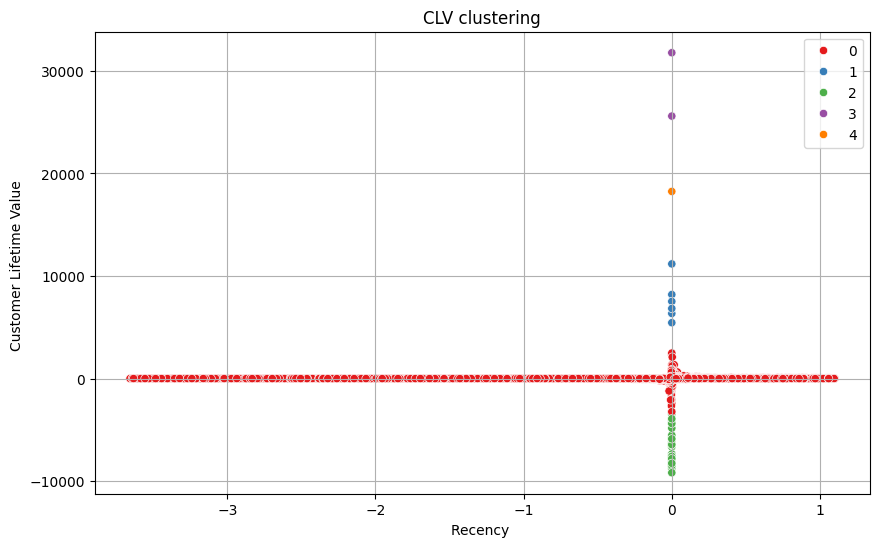

In [20]:
# 산점도 그리기
plt.figure(figsize=(10, 6))

# 각 클러스터에 대한 산점도
sns.scatterplot(x='recency-1', y='CLV', hue='cluster_CLV', data=CLV, palette='Set1')


# 라벨과 제목 추가
plt.xlabel('Recency ')
plt.ylabel('Customer Lifetime Value ')
plt.title('CLV clustering')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
CLV_detail = CLV.groupby('cluster_CLV').agg({
    'recency-1': ['mean', 'min', 'max'],
    'frequency': ['mean', 'min', 'max'],
    'monetary': ['mean', 'min', 'max'],
    'CLV': ['mean', 'min', 'max']
})
CLV_detail

recency-1                     frequency          monetary  \
                     mean       min       max      mean min max      mean   
cluster_CLV                                                                 
0           -1.096087e-07 -3.656501  1.098525  1.383022   1   4  0.000076   
1            1.883658e-04  0.000188  0.000188  1.666667   1   3  0.593342   
2            1.883658e-04  0.000188  0.000188  1.320000   1   4 -0.570394   
3            1.883658e-04  0.000188  0.000188  1.000000   1   1  2.700677   
4            1.883658e-04  0.000188  0.000188  3.000000   3   3  0.859003   

                                           CLV                              
                  min        max          mean           min           max  
cluster_CLV                                                                 
0           -0.950361  15.312372     -0.250531  -3230.672943   2489.091546  
1            0.298962   1.052863   7589.441628   5449.395645  11183.133569  
2           -0.864201  -0.217999  -6589.121686  -9179.228012  -3459.463523  
3            2.409886   2.991467  28685.612906  25596.940082  31774.285731  
4            0.859003   0.859003  18247.464038  18247.464038  18247.464038

# **Min-Max 스케일링**

In [23]:
min_values = rfm.min()
min_values

user_id      1
recency-1    1
frequency    1
monetary     0
dtype: int64

In [24]:
def custom_minmax_scaling_except_id(rfm, min_value=1, max_value=20):
    # 'user_id' 칼럼 제외
    numerical_rfm = rfm.drop(columns=['user_id'])

    # Min-Max 스케일링 적용
    min_val = numerical_rfm.min()
    max_val = numerical_rfm.max()
    scaled_rfm = (numerical_rfm - min_val) / (max_val - min_val) * (max_value - min_value) + min_value
    return scaled_rfm

# 'user_id' 칼럼을 제외한 숫자 데이터로 Min-Max 스케일링 수행
scaled_rfm = custom_minmax_scaling_except_id(rfm)

In [25]:
scaled_rfm

,recency-1,frequency,monetary
0,14.708054,1.000000,2.962914
1,13.114094,1.000000,1.276821
2,18.788591,20.000000,2.283444
3,15.664430,1.000000,3.164238
4,13.645414,1.000000,3.063576
...,...,...,...
58459,19.043624,1.000000,1.150993
58460,14.920582,1.000000,1.704636
58461,17.237136,7.333333,1.855629
58462,18.607942,13.666667,1.478146


In [26]:
scaled_rfm['user_id'] = rfm['user_id']
scaled_rfm

,recency-1,frequency,monetary,user_id
0,14.708054,1.000000,2.962914,1
1,13.114094,1.000000,1.276821,2
2,18.788591,20.000000,2.283444,3
3,15.664430,1.000000,3.164238,4
4,13.645414,1.000000,3.063576,6
...,...,...,...,...
58459,19.043624,1.000000,1.150993,99989
58460,14.920582,1.000000,1.704636,99992
58461,17.237136,7.333333,1.855629,99996
58462,18.607942,13.666667,1.478146,99998


In [27]:
# GKSMS QJQ 방법론을 이용하여 각 고객의 CLV 계산
scaled_rfm = scaled_rfm.assign(G2=scaled_rfm['monetary'])  # 과거 고객 가치 (Monetary를 사용)
# scaled_rfm_data = scaled_rfm[['user_id', 'monetary']].copy().rename(columns={'monetary': 'G'})  # 과거 고객 가치 (Monetary를 사용)
scaled_rfm = scaled_rfm.assign(K2=scaled_rfm['monetary'] * scaled_rfm['frequency'])  # 현재 고객 가치
scaled_rfm = scaled_rfm.assign(S2=scaled_rfm['monetary'] * scaled_rfm['frequency'] / scaled_rfm['recency-1'])  # 잔존 고객 가치
scaled_rfm = scaled_rfm.assign(M2=(scaled_rfm['frequency']) * scaled_rfm['monetary'])  # 모멘텀 고객 가치
# scaled_rfm = scaled_rfm.assign(S=scaled_rfm['monetary'] * scaled_rfm['frequency-1'] / scaled_rfm['recency-1-1'])  # 소셜 고객 가치
scaled_rfm = scaled_rfm.assign(Q2=scaled_rfm['monetary'] / scaled_rfm['frequency'])  # 품질 고객 가치
scaled_rfm = scaled_rfm.assign(J2=scaled_rfm['monetary']  *np.log1p(1/scaled_rfm['recency-1']))  # 행동 고객 가치

In [28]:
scaled_rfm_CLV = scaled_rfm.assign(CLV2 = scaled_rfm[['G2', 'K2', 'S2', 'M2', 'Q2', 'J2']].sum(axis=1))
scaled_rfm_CLV

,recency-1,frequency,monetary,user_id,G2,K2,S2,M2,Q2,J2,CLV2
0,14.708054,1.000000,2.962914,1,2.962914,2.962914,0.201448,2.962914,2.962914,0.194896,12.248000
1,13.114094,1.000000,1.276821,2,1.276821,1.276821,0.097363,1.276821,1.276821,0.093829,5.298476
2,18.788591,20.000000,2.283444,3,2.283444,45.668874,2.430671,45.668874,0.114172,0.118410,96.284444
3,15.664430,1.000000,3.164238,4,3.164238,3.164238,0.202002,3.164238,3.164238,0.195816,13.054771
4,13.645414,1.000000,3.063576,6,3.063576,3.063576,0.224513,3.063576,3.063576,0.216668,12.695485
...,...,...,...,...,...,...,...,...,...,...,...
58459,19.043624,1.000000,1.150993,99989,1.150993,1.150993,0.060440,1.150993,1.150993,0.058906,4.723320
58460,14.920582,1.000000,1.704636,99992,1.704636,1.704636,0.114247,1.704636,1.704636,0.110582,7.043372
58461,17.237136,7.333333,1.855629,99996,1.855629,13.607947,0.789455,13.607947,0.253040,0.104646,30.218665
58462,18.607942,13.666667,1.478146,99998,1.478146,20.201325,1.085629,20.201325,0.108157,0.077375,43.151956


In [29]:
# Selecting relevant columns for clustering
X2 = scaled_rfm_CLV[['G2', 'K2', 'S2', 'M2', 'Q2', 'J2']]

# Number of clusters you want
num_clusters = 5  # You can adjust this based on your data and requirements

# Perform K-means clustering
kmeans_GKSMQJ2 = KMeans(n_clusters=num_clusters, random_state=42)
kmeans_GKSMQJ2.fit(X2)

# Adding cluster labels to the DataFrame
scaled_rfm_CLV['cluster_CLV2'] = kmeans_GKSMQJ2.labels_ # 이전 해둔것 덮어쓰기로 하게 되어있는데 의도하신건지?

# Viewing the clusters
cluster_centers = pd.DataFrame(kmeans_GKSMQJ2.cluster_centers_, columns=['G2', 'K2', 'S2', 'M2', 'Q2', 'J2'])
display(cluster_centers)

# Checking the count of data points in each cluster
print(scaled_rfm_CLV['cluster_CLV2'].value_counts())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,G2,K2,S2,M2,Q2,J2
0,2.047179,2.047179,0.157741,2.047179,2.047179,0.150140
1,2.384182,21.645455,1.341762,21.645455,0.302277,0.144550
2,3.911755,56.164314,3.312849,56.164314,0.317874,0.225805
3,1.957197,12.341393,0.789940,12.341393,0.546118,0.124809
4,2.733841,34.585411,2.053641,34.585411,0.249096,0.159897


cluster_CLV2
0    41342
3     9110
1     4969
4     2407
2      636
Name: count, dtype: int64


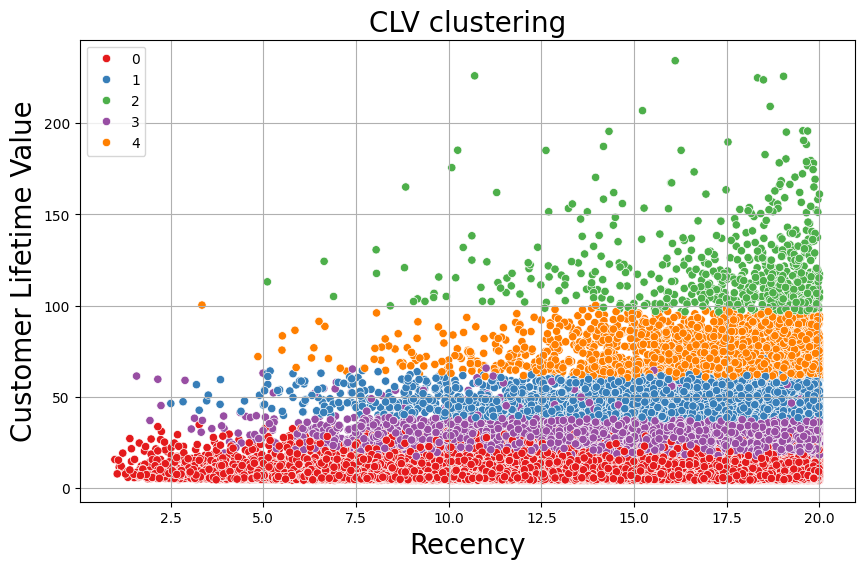

In [44]:
# 산점도 그리기
plt.figure(figsize=(10, 6))

# 각 클러스터에 대한 산점도
sns.scatterplot(x='recency-1', y='CLV2', hue='cluster_CLV2', data=scaled_rfm_CLV, palette='Set1')


# 라벨과 제목 추가
plt.xlabel('Recency', fontsize=20)
plt.ylabel('Customer Lifetime Value', fontsize=20)
plt.title('CLV clustering', fontsize=20)
plt.legend()
plt.grid(True)
plt.show()

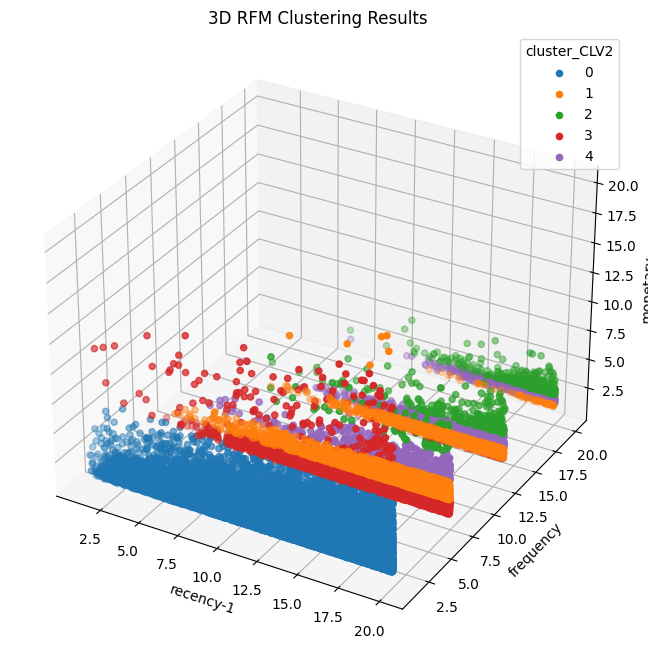

In [32]:
x_feature = 'recency-1'
y_feature = 'frequency'
z_feature = 'monetary'

# 클러스터링 결과를 색상으로 구분하여 3D 산점도 그리기
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for label, cluster in scaled_rfm_CLV.groupby('cluster_CLV2'):
    ax.scatter(cluster[x_feature], cluster[y_feature], cluster[z_feature], label=label)

ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
ax.set_zlabel(z_feature)
ax.set_title('3D RFM Clustering Results')
ax.legend(title='cluster_CLV2')

In [33]:
scaled_rfm_CLV_detail = scaled_rfm_CLV.groupby('cluster_CLV2').agg({
    'recency-1': ['mean', 'min', 'max'],
    'frequency': ['mean', 'min', 'max'],
    'monetary': ['mean', 'min', 'max'],
    'CLV2': ['mean', 'min', 'max', 'count']
})
scaled_rfm_CLV_detail

recency-1                  frequency                       \
                   mean       min   max       mean       min        max   
cluster_CLV2                                                              
0             15.097354  1.000000  20.0   1.000000  1.000000   1.000000   
1             16.970576  2.508949  20.0   9.936003  1.000000  20.000000   
2             17.507943  5.112416  20.0  16.096436  7.333333  20.000000   
3             16.596465  1.584452  20.0   7.169960  1.000000  13.666667   
4             17.384484  3.348434  20.0  14.135023  7.333333  20.000000   

              monetary                             CLV2             \
                  mean       min        max        mean        min   
cluster_CLV2                                                         
0             2.047179  1.000000   7.668874    8.496596   4.099155   
1             2.384233  1.176159  20.000000   47.459483  36.472014   
2             3.910817  2.283444   9.984106  120.065189  96.159812   
3             1.957159  1.050331  16.678146   28.099553  17.036873   
4             2.733319  1.427815   6.158940   74.351035  60.129402   

                                 
                     max  count  
cluster_CLV2                     
0              34.831722  41342  
1              82.023613   4969  
2             234.196090    636  
3              68.675607   9110  
4             100.330088   2407

In [34]:
cluster_means = scaled_rfm_CLV.groupby('cluster_CLV2').agg({
    'recency-1': 'mean',
    'frequency': 'mean',
    'monetary': 'mean',
})

# 클러스터별 평균값을 더하여 새로운 칼럼 추가
cluster_means['total_mean'] = cluster_means.sum(axis=1)
cluster_means.sort_values(by='total_mean')

,recency-1,frequency,monetary,total_mean
cluster_CLV2,,,,
0,15.097354,1.000000,2.047179,18.144533
3,16.596465,7.169960,1.957159,25.723584
1,16.970576,9.936003,2.384233,29.290812
4,17.384484,14.135023,2.733319,34.252826
2,17.507943,16.096436,3.910817,37.515195


In [35]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
silhouette_avg = silhouette_score(X2, kmeans_GKSMQJ2.labels_)
print("The average silhouette score is :", silhouette_avg)


The average silhouette score is : 0.767380964937099


1.   4번 클러스터 고객 : 방문한지는 오래 됐지만 이전에 자주/많이 구매한 고객 (이탈 VIP) >> 우리 제품이 의류 밖에 없으니 이탈했을 가능성 有 (관련된신규제품입점)
2.   0/3번 고객의 경우 최근 방문했지만 방문 횟수와 지출 금액이 적은 고객(신규고객) >> 최근에 방문했으나 마음에 드는 물건 발견 X (다양한 제품 입점)
